# 추론 실시

- SSD 학습 이후 객체 탐지를 수행


- SSD의 추론을 구현

# 사전 준비

- 학습된 가중치 파라미터를 준비
- "utils" 폴더의 ssd_predict_show.py를 실행합니다

In [12]:
import cv2  # OpenCV 라이브러리
import matplotlib.pyplot as plt 
import numpy as np
import torch

%matplotlib inline

# 추론을 실시한다

In [13]:
from utils.ssd_model import SSD

voc_classes = ['aeroplane', 'bicycle', 'bird', 'boat',
               'bottle', 'bus', 'car', 'cat', 'chair',
               'cow', 'diningtable', 'dog', 'horse',
               'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'tvmonitor']

# SSD300 설정
ssd_cfg = {
    'num_classes': 21,  # 배경 클래스를 포함한 총 클래스 수
    'input_size': 300,  # 이미지의 입력 크기
    'bbox_aspect_num': [4, 6, 6, 6, 4, 4],  # 출력할 DBox 화면비 종류
    'feature_maps': [38, 19, 10, 5, 3, 1],  # 각 source의 이미지 크기
    'steps': [8, 16, 32, 64, 100, 300],  # DBOX의 크기를 결정
    'min_sizes': [30, 60, 111, 162, 213, 264],  # DBOX의 크기를 결정
    'max_sizes': [60, 111, 162, 213, 264, 315],  # DBOX의 크기를 결정
    'aspect_ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]],
}

# SSD 네트워크 모델
net = SSD(phase="inference", cfg=ssd_cfg)

# SSD의 학습된 가중치를 설정
net_weights = torch.load('./weights/ssd300_50.pth',
                         map_location={'cuda:0': 'cpu'})

# net_weights = torch.load('./weights/ssd300_mAP_77.43_v2.pth',
#                         map_location={'cuda:0': 'cpu'})

net.load_state_dict(net_weights)

print('네트워크 설정 완료: 학습된 가중치를 로드했습니다')


네트워크 설정 완료: 학습된 가중치를 로드했습니다


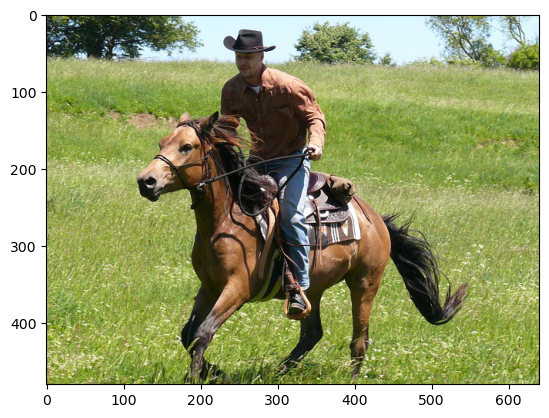

torch.Size([1, 21, 200, 5])
tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0258, 0.6962, 0.0428, 0.7478, 0.0932],
          [0.0238, 0.7318, 0.0403, 0.7816, 0.0925],
          [0.0223, 0.9299, 0.0100, 1.0032, 0.0746],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

         [[0.0132, 0.6086, 0.8890, 0.6795, 0.9875],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.00

In [16]:
from utils.ssd_model import DataTransform

# 1. 이미지 읽기
image_file_path = "./data/rodeo-g9ee124e2d_640.jpg"
img = cv2.imread(image_file_path)  # [높이][폭][색BGR]
height, width, channels = img.shape  # 이미지의 크기를 취득

# 2. 원본 이미지 표시
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 3. 전처리 클래스 작성
color_mean = (104, 117, 123)  # (BGR)의 색의 평균값
input_size = 300  # 이미지의 input 크기를 300×300으로 설정
transform = DataTransform(input_size, color_mean)

# 4. 전처리
phase = "val"
img_transformed, boxes, labels = transform(
    img, phase, "", "")  # 어노테이션은 없으므로, ""으로 설정
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

# 5. SSD로 예측
net.eval()  # 네트워크를 추론 모드로
x = img.unsqueeze(0)  # 미니배치화: torch.Size([1, 3, 300, 300])
detections = net(x)

print(detections.shape)
print(detections)

# output : torch.Size([batch_num, 21, 200, 5])
#  = (batch_num, 클래스, conf의 top200, 규격화된 BBox의 정보)
#   규격화된 BBox의 정보(신뢰도, xmin, ymin, xmax, ymax)


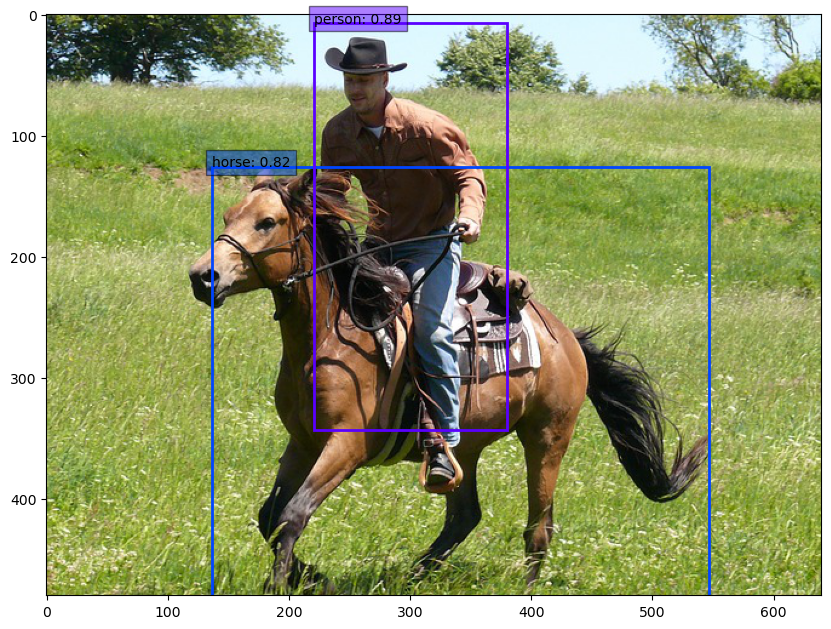

In [17]:
# 이미지 예측
from utils.ssd_predict_show import SSDPredictShow

# 파일 경로
image_file_path = "./data/rodeo-g9ee124e2d_640.jpg"

# 에측 및 결과를 이미지으로 그린다
ssd = SSDPredictShow(eval_categories=voc_classes, net=net)
ssd.show(image_file_path, data_confidence_level=0.6)

